For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data


Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.
Round 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.
Round 4

fit a Random forest Classifier on the data and compare the accuracy.
tune the hyper paramters with gridsearch and check the results.
Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [1]:
#pos label use!
#labels =

### Loading Libraries

In [2]:
import pandas as pd
import numpy as np;
import scipy;
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Data splitting

#### Loading a dataset for classification

In [3]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
from sklearn import datasets

In [5]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churnData['TotalCharges'] = churnData['TotalCharges'].apply(pd.to_numeric, errors='coerce')

churnData.info()

#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### null values

In [8]:
churnData = churnData.dropna()


In [9]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
X=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
#X=X._get_numeric_data()

y =churnData[['Churn']]
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   SeniorCitizen   7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB


### Logistic Regression

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.794311,0.781805
1,Precision,0.658266,0.675676
2,Recall,0.443916,0.439698


Confusion matrix for the train set
[[3815  339]
 [ 818  653]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


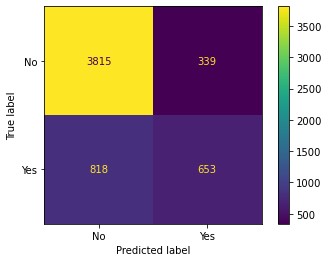



Confusion matrix for the test set
[[925  84]
 [223 175]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


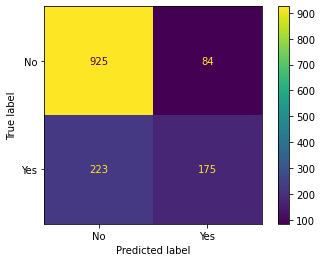

In [12]:
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label ='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label ='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label ='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label ='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred_test=model.predict(X_test)  #burada_test eksikti
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


classification_plot_confusion_matrix
Classification Model confusion matrix for training and test set

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


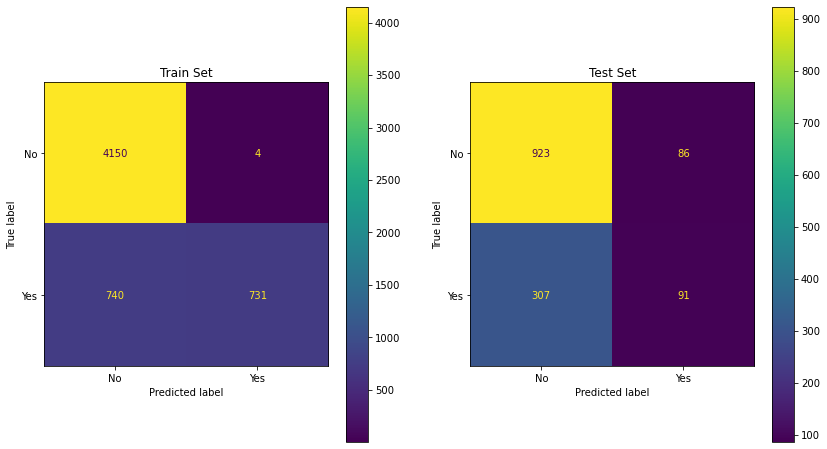

In [14]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model, X_train, y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model, X_test, y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [15]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train, pos_label ='Yes'),
                                         recall_score(y_train, y_pred_train, pos_label ='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test, pos_label ='Yes'),
                                        recall_score(y_test, y_pred_test, pos_label ='Yes')]})
    
    #pd.options.display.float_format = '{:.2f}'.format

    #df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    #df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df   #, df_train, df_test



## calling the function
#error_metrics_df,y_train_vs_predicted, 
    
#y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test)
#error_metrics_df

In [16]:
evaluate_classification_model(y_train, y_pred_train, y_test, y_pred)

,Error_metric,Train,Test
0,Accuracy,0.867733,0.720682
1,Precision,0.994558,0.514124
2,Recall,0.496941,0.228643


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [18]:
X1=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
#X=X._get_numeric_data()

y1 =churnData[['Churn']]
X1

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=11)

In [20]:
dt = DecisionTreeClassifier(max_features=None, random_state=None, max_depth=4, min_samples_split=2, min_samples_leaf=1)

,Error_metric,Train,Test
0,Accuracy,0.791548,0.769194
1,Precision,0.664634,0.618785
2,Recall,0.420525,0.390925


Confusion matrix for the train set
[[3351  751]
 [ 275  545]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


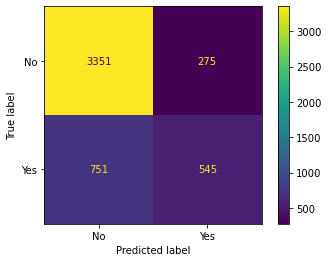



Confusion matrix for the test set
[[1399  349]
 [ 138  224]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


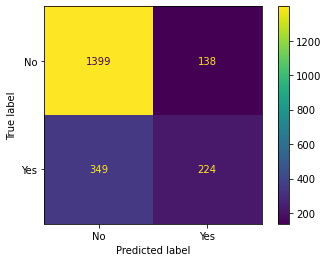

In [21]:
dt.fit(X1_train, y1_train)

y1_pred_train_dt = dt.predict(X1_train)
y1_pred_test_dt = dt.predict(X1_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y1_train, y1_pred_train_dt),
                                         precision_score(y1_train, y1_pred_train_dt, pos_label = 'Yes'),
                                         recall_score(y1_train, y1_pred_train_dt, pos_label = 'Yes')],
                               'Test': [accuracy_score(y1_test, y1_pred_test_dt),
                                        precision_score(y1_test, y1_pred_test_dt, pos_label = 'Yes'),
                                        recall_score(y1_test, y1_pred_test_dt, pos_label = 'Yes')]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y1_train,y1_pred_train_dt).T)
plot_confusion_matrix(dt,X1_train,y1_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y1_test,y1_pred_test_dt).T)
plot_confusion_matrix(dt,X1_test,y1_test, values_format = 'd')
plt.show()

#### Plotting Feature importances

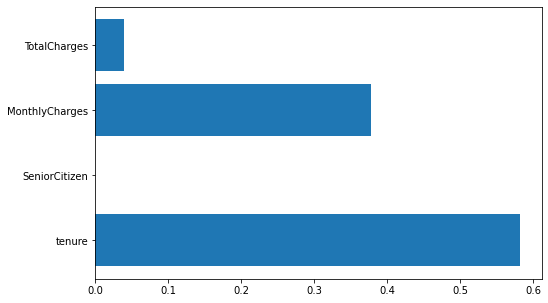

In [22]:
plt.figure(figsize=(8,5))
plt.barh(X.columns, dt.feature_importances_)
plt.show()

#### Plotting the decision tree

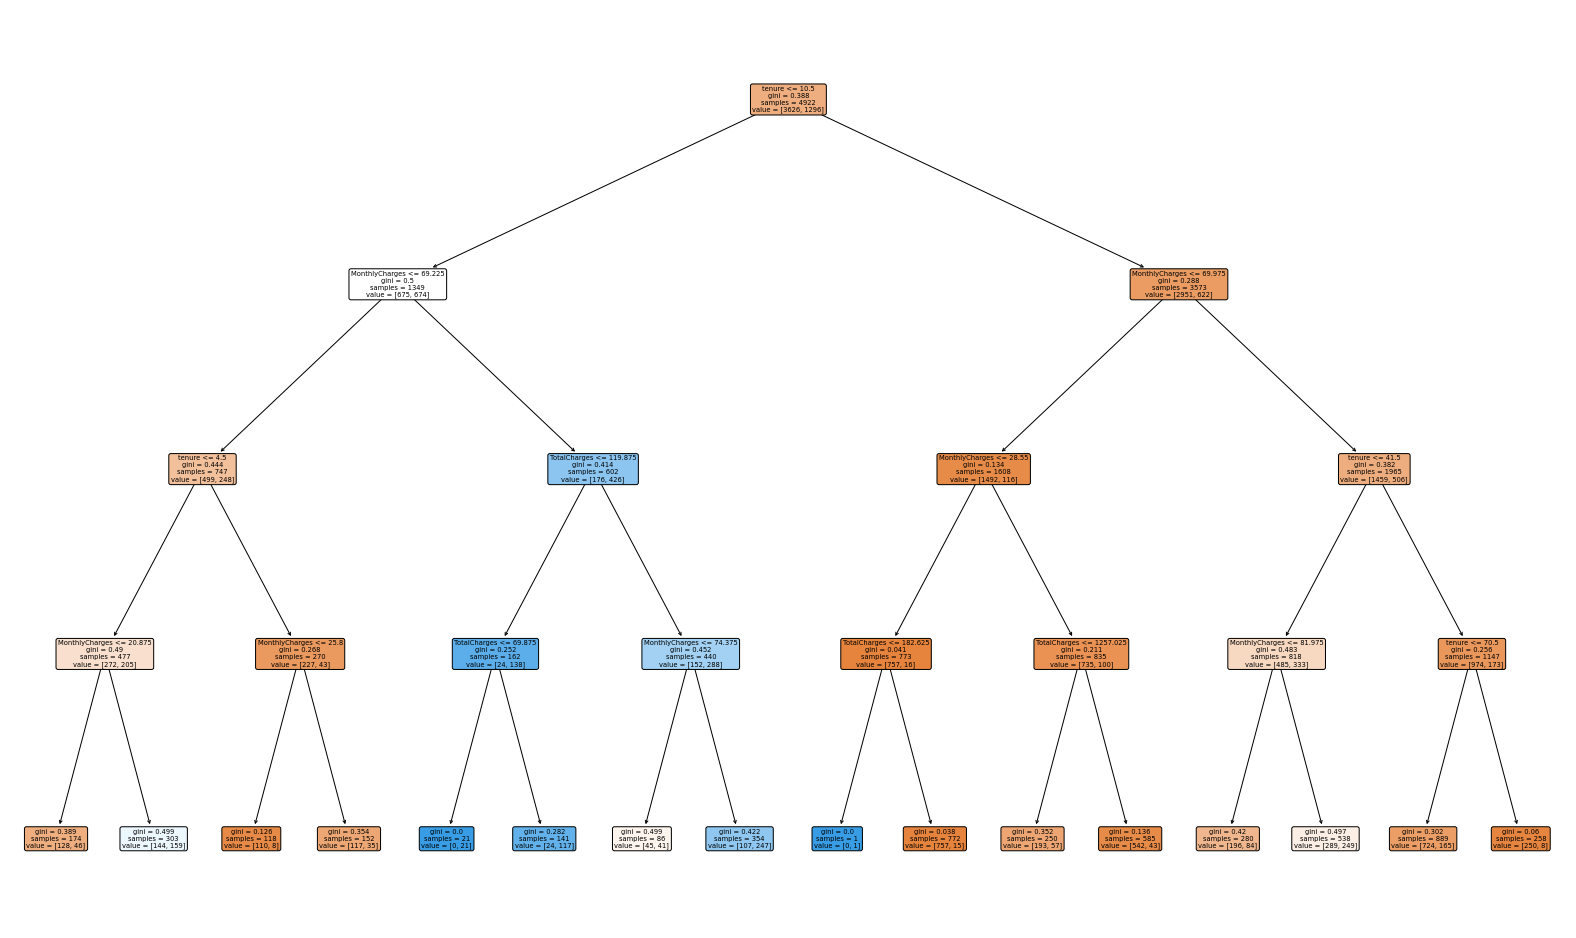

In [23]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (28,17))

plot_tree(dt,filled = True, rounded=True,feature_names=X1.columns)
plt.show() 

### Day 4

####  K-fold cross validation

 first we need to balance the data! but first check the cross validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [25]:
X_cv=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
#X=X._get_numeric_data()

y_cv =churnData[['Churn']]
X_cv

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [26]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_cv, y_cv, test_size=0.20)
model= DecisionTreeClassifier()
model.fit(X_cv_train, y_cv_train)
model.score(X_cv_test, y_cv_test)

0.7178393745557925

In [27]:
X_cv_train.shape

(5625, 4)

In [28]:
scores=cross_val_score(model, X_cv_train, y_cv_train, cv=7)
scores

array([0.73507463, 0.70522388, 0.71393035, 0.70522388, 0.72353674,
       0.72976339, 0.71980075])

In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.01


In [30]:
y_cv_pred = cross_val_predict(model, X_cv_test, y_cv_test, cv=5)
y_cv_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Balancing the Data

#### Method 1: Downsampling

 Here I create a whole dataframe with all the columns. after that I say if the churn is equal to this, create the category. 
The categories are 1 or 0, but in this case yes or no

In [31]:
categories=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges','Churn']]
#X=X._get_numeric_data()

category_1 =categories[categories['Churn'] == 'Yes']
category_0 =categories[categories['Churn'] == 'No']
print(category_0.shape)
print(category_1.shape)

(5163, 5)
(1869, 5)


category_1 is the majority class because it has 5163 So take a sample with the same size of category_0 from category_1 to make them equal

In [32]:
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


 concatinating again with shuffle

In [33]:
data = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [34]:
#### Compare downsampled and original data

In [35]:
X_downsampled = data[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y_downsampled = data[['Churn']]

model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier(max_features=4, random_state=123, max_depth=6, min_samples_split=5, min_samples_leaf=1)

model_pipeline = [model1, model2, model3, model4]
model_names = ['Classifier Tree', 'Logistic Regression', 'KNN Classifier2', 'Decision_Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_downsampled, y_downsampled, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
               
print(scores)

{'Classifier Tree': 0.6629159438574357, 'Logistic Regression': 0.7428997433728549, 'KNN Classifier2': 0.6958308841450301, 'Decision_Tree': 0.7319393270347379}


#### Method 2A: Upsampling Method 1

In [36]:
upsampling1=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges','Churn']]
#X=X._get_numeric_data()

upsampling1_1 =upsampling1[upsampling1['Churn'] == 'Yes']
upsampling1_0 =upsampling1[upsampling1['Churn'] == 'No']
print(upsampling1_1.shape)
print(upsampling1_0.shape)


(1869, 5)
(5163, 5)


In [37]:
upsampling1_1 = upsampling1_1.sample(len(upsampling1_0), replace=True)
print(upsampling1_0.shape)
print(upsampling1_1.shape)

(5163, 5)
(5163, 5)


In [38]:
data2 = pd.concat([upsampling1_0, upsampling1_1], axis=0)
#shuffling the data
data2 = data.sample(frac=1)
data2['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

#### Compare upsampled and original data

In [39]:
X_downsampled = data2[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y_downsampled = data2[['Churn']]

model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier(max_features=4, random_state=123, max_depth=6, min_samples_split=5, min_samples_leaf=1)

model_pipeline = [model1, model2, model3, model4]
model_names = ['Classifier Tree', 'Logistic Regression', 'KNN Classifier2', 'Decision_Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_downsampled, y_downsampled, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
               
print(scores)

{'Classifier Tree': 0.6650664506602055, 'Logistic Regression': 0.7421133747186419, 'KNN Classifier2': 0.7003849407176957, 'Decision_Tree': 0.7290010179065534}


#### Method 2B: Upsampling using SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

 Just split the data to X and y and the model smot does everything  :)

In [41]:
X_smote=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

y_smote =churnData[['Churn']]
y_smote.value_counts()

Churn
No       5163
Yes      1869
dtype: int64

In [42]:
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)
y_sm.value_counts()

Churn
No       5163
Yes      5163
dtype: int64

In [43]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier(max_features=4, random_state=123, max_depth=6, min_samples_split=5, min_samples_leaf=1)

model_pipeline = [model1, model2, model3, model4]
model_names = ['Classifier Tree', 'Logistic Regression', 'KNN Classifier2', 'Decision_Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
               
print(scores)

{'Classifier Tree': 0.7459870776019272, 'Logistic Regression': 0.7303921182376911, 'KNN Classifier2': 0.7650623419407612, 'Decision_Tree': 0.7538277538891015}


#### Method 3: Downsampling using Tomeklinks

In [44]:
X_tomek=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

y_tomek =churnData[['Churn']]
y_tomek.value_counts()

Churn
No       5163
Yes      1869
dtype: int64

In [45]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X_tomek, y_tomek)
y_tl.value_counts()

Churn
No       4610
Yes      1869
dtype: int64

In [46]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier(max_features=4, random_state=123, max_depth=6, min_samples_split=5, min_samples_leaf=1)

model_pipeline = [model1, model2, model3, model4]
model_names = ['Classifier Tree', 'Logistic Regression', 'KNN Classifier2', 'Decision_Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_tl, y_tl, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
               
print(scores)

{'Classifier Tree': 0.7397752208674414, 'Logistic Regression': 0.7890133951571355, 'KNN Classifier2': 0.7780558894804129, 'Decision_Tree': 0.7928742820615566}


### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:

X_randomf=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

y_randomf =churnData[['Churn']]


X_train, X_test, y_train, y_test = train_test_split(X_randomf, y_randomf, test_size=0.20, random_state=11)

clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)




clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8757333333333334
0.7590618336886994


In [49]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.8       , 0.79733333, 0.78488889, 0.78844444, 0.78666667])

### Implementing hyperparameter tuning

#### Grid Search

Let's take the data from downsampling and use random forest to see how balanced data works with random forest and make grid search after

In [50]:
data 

X=data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

y=data[['Churn']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)


clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8812709030100334
0.7379679144385026


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [53]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True, n_jobs=-1,)

In [54]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [55]:
#grid_search.best_params_   #To check the best set of parameters returned

print(grid_search.best_params_)

{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


 And now, take the recommended best params and use them to see

In [56]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.714046822742475
